# Simple Montecarlo Example

In [1]:
%load_ext autoreload
%autoreload 2

First, we run a simple training session

## Train a Simple Model

In [2]:
!rm -rf ts_outputs/train
!rm -rf model
!python ./simplemodel_train.py

/Users/olg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
[]
2019-04-05 14:34:02.094580: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch: 0050 cost= 3104.478515625 W= 0.7013317 b= -0.7513837
Epoch: 0100 cost= 1663.492919922 W= 1.2167331 b= -0.70078397
Epoch: 0150 cost= 1494.956542969 W= 1.676906 b= -0.6461264
Epoch: 0200 cost= 1425.953125000 W= 2.0596466 b= -0.5902155
Epoch: 0250 cost= 1009.103332520 W= 2.4021945 b= -0.5360564
Epoch: 0300 cost= 705.229492188 W= 2.7332413 b= -0.48922735
Epoch: 0350 cost= 478.398620605 W= 3.005212 b= -0.44201857
Epoch: 0400 cost= 518.774963379 W= 3.246182 b= -0.39722693
Epoch: 0450 cost= 328.689178467

This will deposit a model in `./model`

In [3]:
!ls -l ./model/

total 48
-rw-r--r--  1 olg  ANT\Domain Users     67 Apr  5 14:34 checkpoint
-rw-r--r--  1 olg  ANT\Domain Users      8 Apr  5 14:34 model.data-00000-of-00001
-rw-r--r--  1 olg  ANT\Domain Users    142 Apr  5 14:34 model.index
-rw-r--r--  1 olg  ANT\Domain Users  35877 Apr  5 14:34 model.meta


And will deposit the Tornasole/Montecarlo data in `./ts_output/train/`


In [4]:
!ls -l ./ts_outputs/train/

total 0
drwxr-xr-x  513 olg  ANT\Domain Users  16416 Apr  5 14:34 f737ea16-0914-4ae5-939b-3c63c7402e31


## Run Inference on the Trained Model

Now we load the model we previously deposited in `./model` and run inference. The Tornasole/Montecarlo traces will be deposited in `./ts_output/infer`. We only trace three tensors: `X:0` (the input), `product:0` (an intermediate result), `pred:0` (the output)

In [5]:
!rm -rf ts_outputs/infer
!python simplemodel_infer.py

/Users/olg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
['^product:0$', '^X:0$', '^Y_hat:0$']
2019-04-05 14:34:20.342901: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Running sample 0
Running sample 10
Running sample 20
Running sample 30
Running sample 40
Running sample 50
Running sample 60
Running sample 70
Running sample 80
Running sample 90


The output of the Montecarlo trace is deposited in `ts_outputs/infer/`. Each directory shown below contains the trace for a single batch (of size==1, in this case)

In [6]:
!ls -l ./ts_outputs/infer/*/ | head

total 0
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 0
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 1
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 10
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 11
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 12
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 13
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 14
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 15
drwxr-xr-x  4 olg  ANT\Domain Users  128 Apr  5 14:34 16


## Running MonteCarlo

Now we have traces for a single training run, which ran for multiple batches, in `./ts_outputs/train/`, and a single inference run, which ran for 100 batches of size==1, in `./ts_outputs/infer/`. 

Let's say that we want to compare the distribution of inputs, intermediate results, and outputs.

In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Adjust this path to match your Tornasole installation
sys.path.append('/Users/olg/Software/tornasole_tf/')

from tornasole_rules.run_catalog import LocalRunCatalog
from tornasole_rules.local_run import LocalRun

tdir = "./ts_outputs/train"
idir = "./ts_outputs/infer"

# We scan the disc to find the training run
training_run_catalog = LocalRunCatalog(tdir)
inference_run_catalog = LocalRunCatalog(idir)

/Users/olg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
training_run_names = training_run_catalog.list_candidates()
for training_run_name in training_run_names:
    print( f'Training Run {training_run_name}')
    tr = LocalRun(training_run_name, os.path.join(tdir,training_run_name))

Training Run f737ea16-0914-4ae5-939b-3c63c7402e31


In [9]:
inference_run_names = inference_run_catalog.list_candidates()
for inference_run_name in inference_run_names:
    print( f'Inference Run {inference_run_name}')
    ir = LocalRun(inference_run_name, os.path.join(idir,inference_run_name))


Inference Run 1887d3d1-8d37-45e4-b6c2-6f1bcb06b6ab


We want to find which steps of the training run we have traces for

We have information for 511 steps of the training run


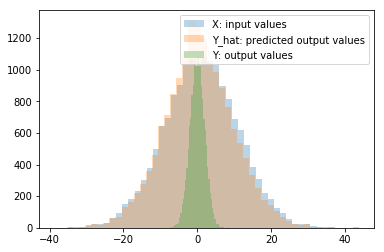

In [10]:
print( f'We have information for {len(tr.getsteps())} steps of the training run' )

def all_vals(run, name):
    vs = []
    for st in run.getsteps():
        v = run.step(st).get_tensor(name).as_numpy()
        #print(v)
        vs.append(v)
    return np.array(vs)

xs_train = all_vals(tr,"X:0").flatten()
ys_train = all_vals(tr,"Y:0").flatten()
y_hats_train = all_vals(tr, "Y_hat:0").flatten()

plt.hist(ys_train,bins=50, alpha=0.3, label="X: input values")
plt.hist(y_hats_train,bins=50, alpha=0.3, label="Y_hat: predicted output values")
plt.hist(xs_train,bins=50, alpha=0.3, label="Y: output values")
plt.legend()
plt.show()

We can do the same for the inference runs. Notice the difference in distribution between training and inference inputs.

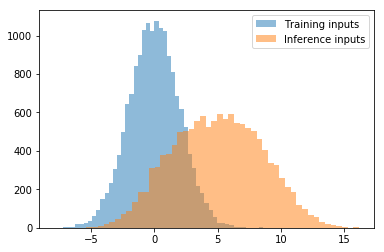

In [11]:
xs_infer = all_vals(ir,"X:0").flatten()
plt.hist(xs_train, bins=50, alpha=0.5, label="Training inputs")
plt.hist(xs_infer, bins=50, alpha=0.5, label="Inference inputs")
plt.legend()
plt.show()

We can also look at values _inside_, say a tensor named `product`. Again, note the difference between training and inference.

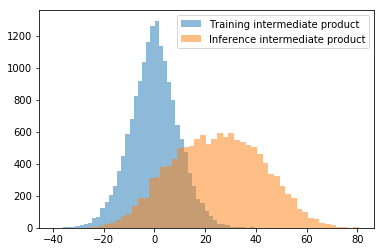

In [12]:
product_train = all_vals(tr, "product:0").flatten()
product_infer = all_vals(ir, "product:0").flatten()

plt.hist(product_train, bins=50, alpha=0.5, label="Training intermediate product")
plt.hist(product_infer, bins=50, alpha=0.5, label="Inference intermediate product")
plt.legend()
plt.show()
